In [ ]:
import tensorflow as tf

# Cifar10 Datensatz laden
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

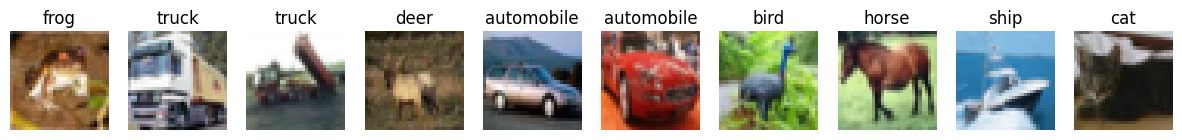

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Klassenlabels für CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Funktion zum Anzeigen der Bilder mit Labels
def show_images(images, labels, num_images=10):
  plt.figure(figsize=(15, 5))
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i][0]])
    plt.axis('off')
  plt.show()

# Zeige die ersten 10 Bilder des Trainingsdatensatzes mit den entsprechenden Labels
show_images(x_train, y_train)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ImageNet-Modell laden (ohne die letzten Schichten)
base_model = tf.keras.applications.DenseNet121(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

# Schichten des Basismodells einfrieren
base_model.trainable = False

# Modell definieren
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.1),
  tf.keras.layers.RandomTranslation(0.1, 0.1)
])

mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

normalization_layer = tf.keras.layers.Normalization(mean=mean, variance=std**2)

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(32, 32, 3)),
  data_augmentation,
  normalization_layer,
  base_model,  # Das ImageNet-Basismodell hinzufügen
  # Global Average Pooling anstatt Flatten
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

# Modell kompilieren
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Modell trainieren
model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

eval = model.evaluate(x_test, y_test)
eval

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,567,434 (28.87 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.4827 - loss: 1.4834 - val_accuracy: 0.6282 - val_loss: 1.0540
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - accuracy: 0.5734 - loss: 1.1958 - val_accuracy: 0.6240 - val_loss: 1.0526
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5936 - loss: 1.1408 - val_accuracy: 0.6416 - val_loss: 1.0067
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.6041 - loss: 1.1107 - val_accuracy: 0.6409 - val_loss: 1.0139
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.6160 - loss: 1.0802 - val_accuracy: 0.6522 - val_loss: 0.9868
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.6220 - loss: 1.0710 - val_accuracy: 0.6535 - val_loss: 0.9763
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.6229 - loss: 1.0645 - val_accuracy: 0.6582 - val_loss: 0.9599
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6

[0.9512706995010376, 0.6739000082015991]